In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/thyroidDF.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [55]:
data.shape

(9172, 31)

In [56]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [57]:
data.duplicated().sum()

0

In [58]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1 ,inplace=True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

**Decoding Thyroid Diagnoses: Understanding Categorical Target Variables in Health Data**

---
The diagnosis consists of a string of letters indicating diagnosed conditions. A diagnosis "-" indicates no condition requiring comment. A diagnosis of the form "X|Y" is interpreted as "consistent with X, but more likely Y". The conditions are divided into groups where each group corresponds to a class of comments.

	Letter	Diagnosis
	------	---------

hyperthyroid conditions:

	A	hyperthyroid
	B	T3 toxic
	C	toxic goitre
	D	secondary toxic

hypothyroid conditions:

	E	hypothyroid
	F	primary hypothyroid
	G	compensated hypothyroid
	H	secondary hypothyroid

binding protein:

	I	increased binding protein
	J	decreased binding protein

general health:

	K	concurrent non-thyroidal illness

replacement therapy:

	L	consistent with replacement therapy
	M	underreplaced
	N	overreplaced

antithyroid treatment:

	O	antithyroid drugs
	P	I131 treatment
	Q	surgery

miscellaneous:

	R	discordant assay results
	S	elevated TBG
	T	elevated thyroid hormones

hyperthyroid conditions (A, B, C, D)
hypothyroid conditions (E, F, G, H)
binding protein (I, J)
general health (K)
replacement therapy (L, M, N)
discordant results (R)


In [60]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [61]:
data = data[data['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [62]:
data.shape

(7679, 23)

In [63]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }

data['target'] = data['target'].map(mapping)

<ipython-input-63-24bbdfa39ad5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

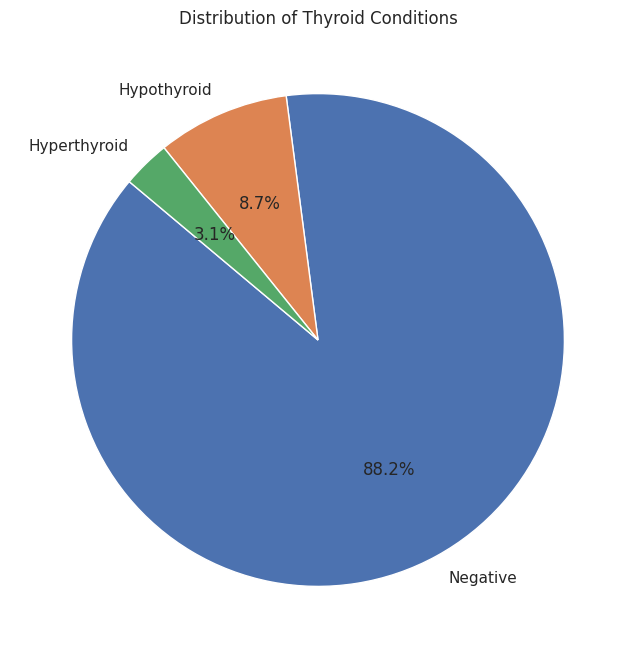

In [65]:
value_counts = data['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Thyroid Conditions')
plt.show()

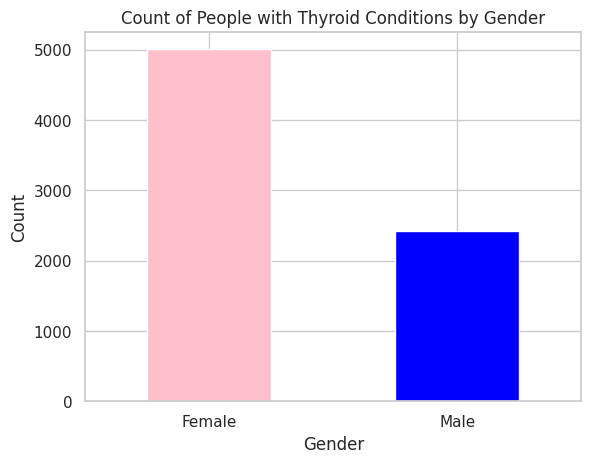

In [66]:
thyroid_diagnosed = data[data['target'] != 0]

gender_counts = thyroid_diagnosed['sex'].value_counts()

gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Count of People with Thyroid Conditions by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

In [67]:
data.age.unique()

array([   29,    41,    36,    60,    77,    28,    54,    42,    51,
          37,    16,    43,    63,    40,    75,    56,    85,    67,
          61,    46,    44,    82,    64,    70,    33,    53,    52,
          59,    49,    35,    48,    27,    69,    76,    73,    68,
          66,    30,    58,    21,    38,    45,    62,    25,    86,
          83,    72,    55,    14,    15,    39,    20,    80,    90,
          23,    13,    78,    24,    71,    81,    92,    57,    74,
           9,    47,    17,    11,    50,    32,    26,    34,     8,
          79,    31,    65,    84,    12,    10,    88,    18,     1,
          22,     2,    97,     6,    19,    89,    87,   455,    91,
          94,     7, 65511,     4, 65512,     3,    93, 65526,     5,
          95])

In [68]:
#There are some outliers in age col so we will consider only below 100

data = data[data['age'] < 100]

In [69]:
data.isnull().sum()

,0
age,0
sex,254
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [70]:
#out of all col TBG has high missing values so we can remove the col

data.drop(['TBG'],axis=1 ,inplace=True)

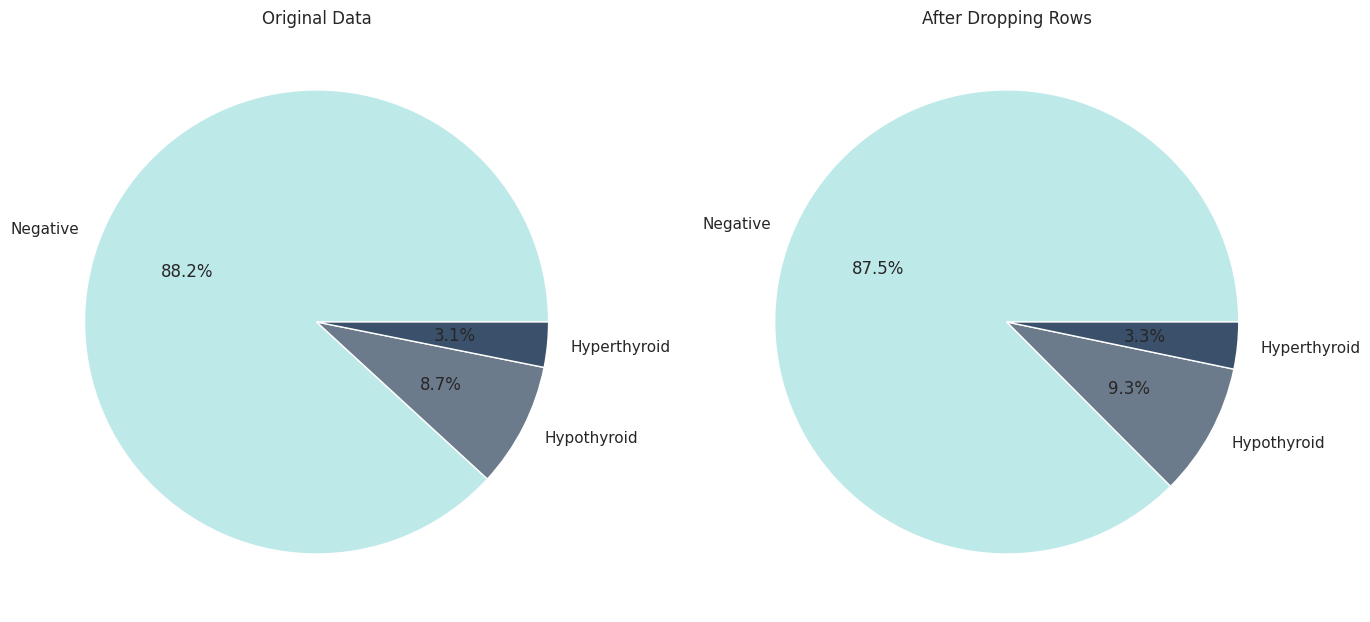

In [71]:
origin = pd.DataFrame(data['target'].value_counts()).reset_index()
origin.columns = ['target', 'count']


after = pd.DataFrame(data.dropna(thresh=21)['target'].value_counts()).reset_index()
after.columns = ['target', 'count']


fig, axes = plt.subplots(1, 2, figsize=(14, 7))


colors = ["#BEE9E9", "#6C7B8B", "#3A506B"]


axes[0].pie(origin['count'], labels=origin['target'], autopct='%1.1f%%', colors=colors)
axes[0].set_title('Original Data')

axes[1].pie(after['count'], labels=after['target'], autopct='%1.1f%%', colors=colors)
axes[1].set_title('After Dropping Rows')


plt.tight_layout()
plt.show()

In [72]:
#We can see the percent of minor classes increased after removing rows with thresh = 21

data = data.dropna(thresh=21)

In [73]:
data.shape

(6652, 22)

In [74]:
data.isnull().sum()

,0
age,0
sex,157
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [75]:
#we will fill the missing values with the help of rolette fill in sex col

#def rolette_fill(df, column, val1, val2):
   # threshold = df[column].value_counts()[val1] / (df.shape[0] - df[column].isnull().sum())

   #for i in df.index:
       # if pd.isna(df.loc[i, column]) or pd.isnull(df.loc[i, column]):
           # rand_num = np.random.rand()
           # if rand_num > threshold:
             #   df.loc[i, column] = val2
           # else:
             #   df.loc[i, column] = val1

   # return df




In [76]:
#data= rolette_fill(data.copy(), 'sex', 'F', 'M')


In [77]:
sex_to_num = {
    'F':0,
    'M':1,
}
data['sex'] = data['sex'].map(sex_to_num)
data['sex'].fillna(data['sex'].mode()[0], inplace=True)




In [78]:
import plotly.express as px
cols = ['TSH', 'TT4', 'FTI','T3','T4U']
px.box(data, x=cols, color='target', height=900,
              color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F63366', 'Negative': '#3498db'}
)

In [79]:
cols = ['TSH', 'TT4', 'FTI', 'T3', 'T4U']


def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

cleaned_data = remove_outliers(data, cols)


fig = px.box(cleaned_data, x=cols,  color='target', height=900,
             color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F63366', 'Negative': '#3498db'})
fig.show()

<Axes: >

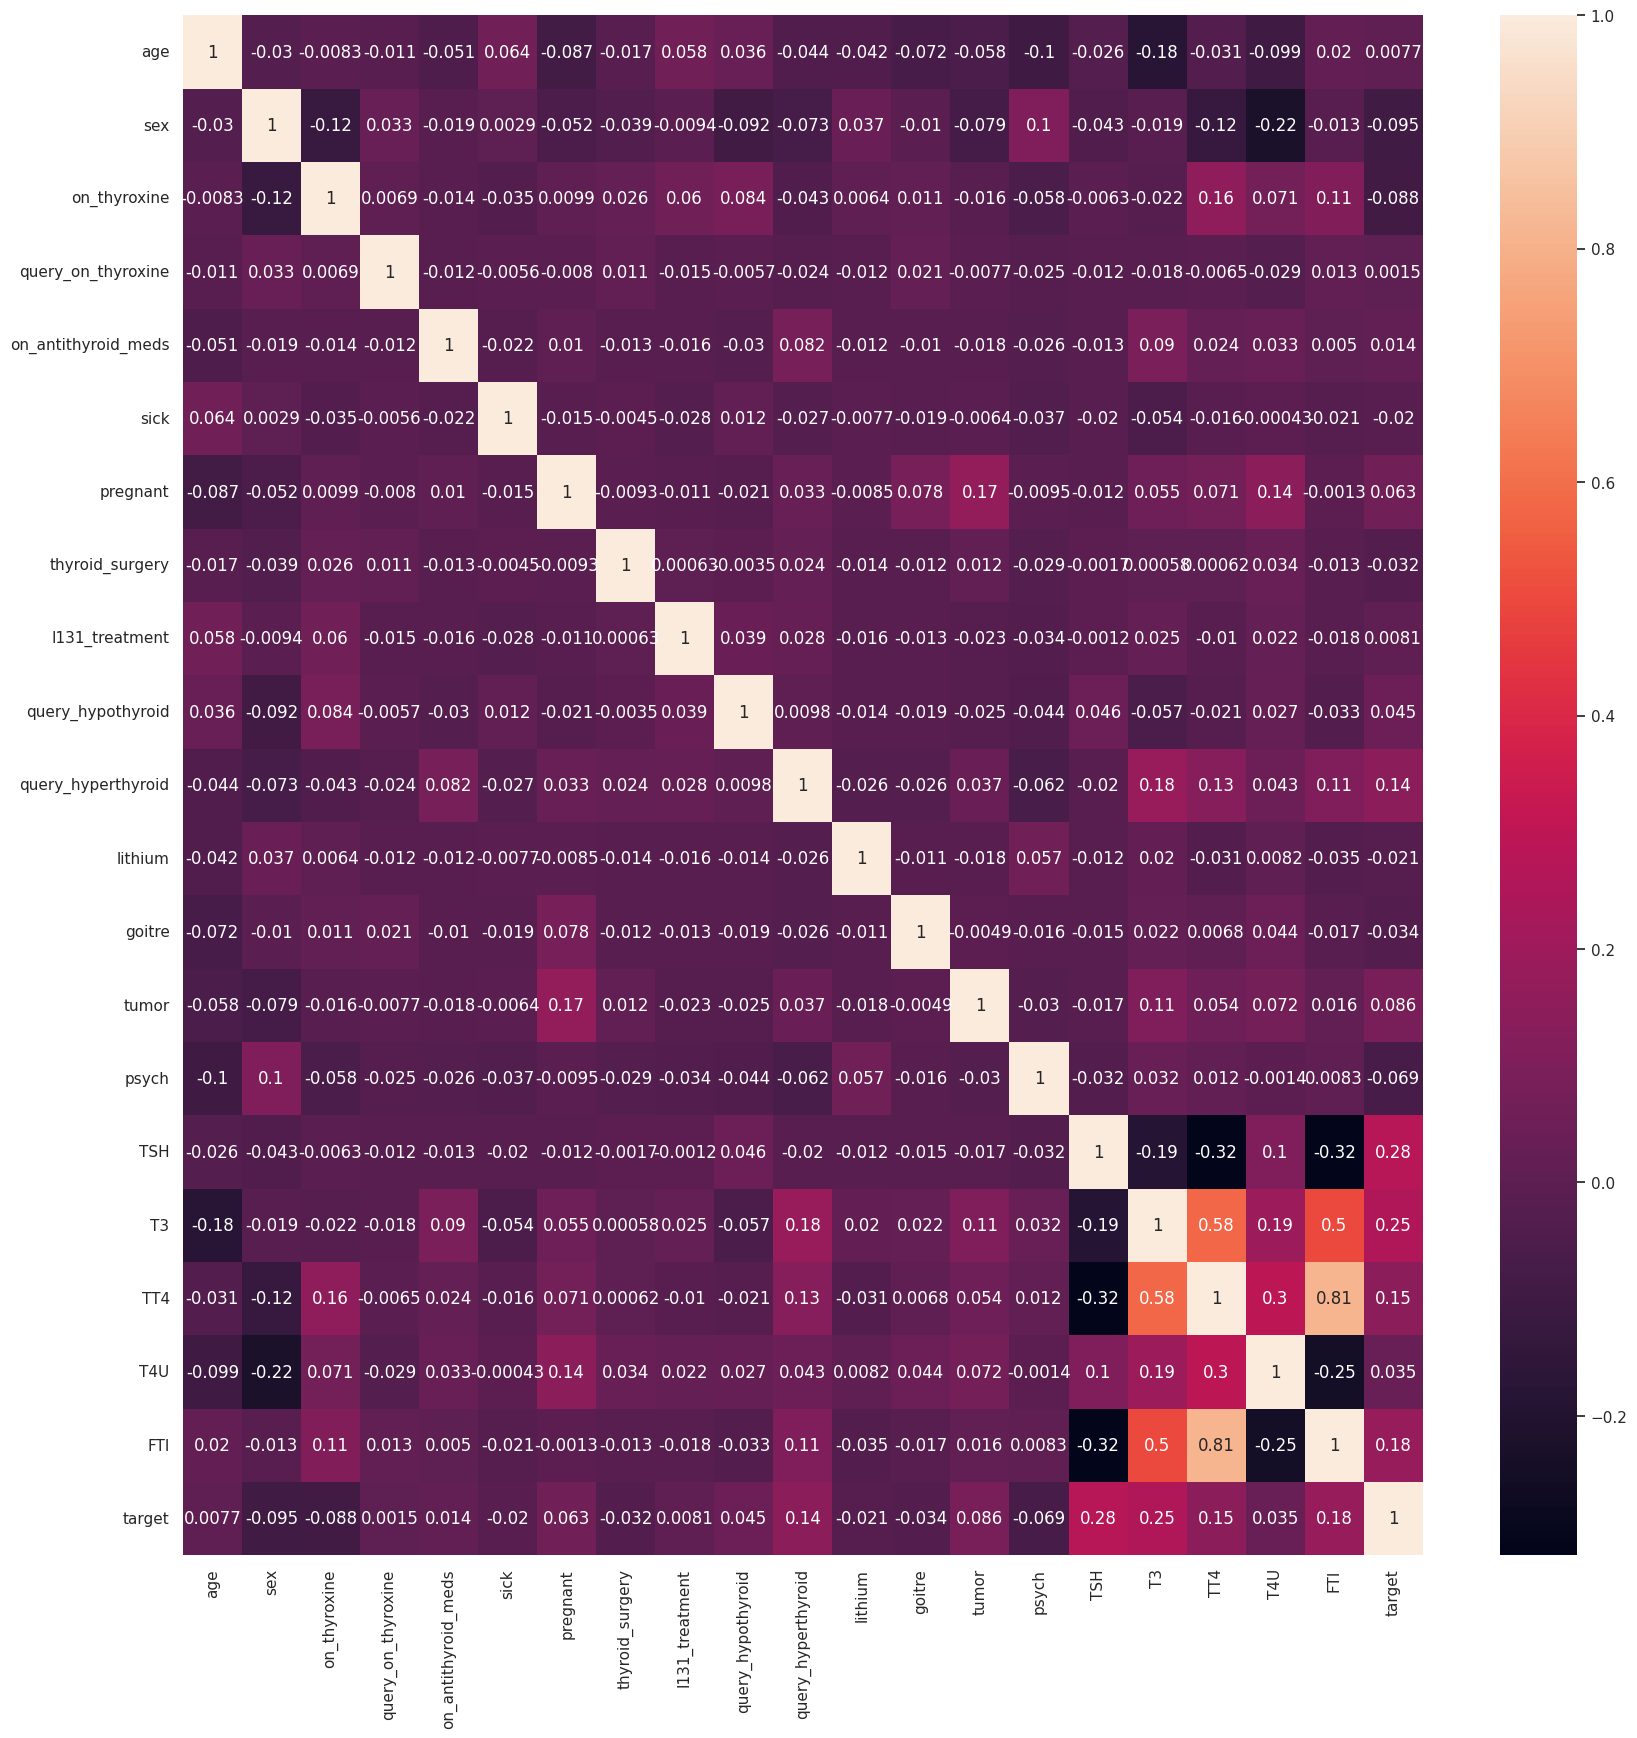

In [82]:
sample_dt = data.copy()
sample_dt_sub = sample_dt.drop('hypopituitary',axis=1)
sample_dt_sub.replace('f', 0, inplace=True)
sample_dt_sub.replace('t', 1, inplace=True)

sample_dt_sub.replace('M', 0, inplace=True)
sample_dt_sub.replace('F', 1, inplace=True)

sample_dt_sub.replace('Negative', 0, inplace=True)
sample_dt_sub.replace('Hypothyroid', 1, inplace=True)
sample_dt_sub.replace('Hyperthyroid', 2, inplace=True)

plt.figure(figsize=(20,20))
sns.heatmap(sample_dt_sub.corr(),annot=True)



In [32]:
#By seeing above heatmap harmonal test are the best for detecting so we will train our model based on these col
columns = ['age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant', 'target']
model_df = cleaned_data.loc[:, columns]

In [33]:
model_df['pregnant'] = model_df['pregnant'].replace({'t': 1, 'f': 0})

In [34]:
target_to_num = {
    'Negative': 0,
    'Hypothyroid':1,
    'Hyperthyroid':2,
}
model_df['target'] = model_df['target'].map(target_to_num)



In [35]:

x = model_df.drop('target', axis=1)
y = model_df['target']

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

In [37]:
from imblearn.over_sampling import SMOTE

x_smot, y_smot = SMOTE(k_neighbors=2).fit_resample(x, y)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smot, y_smot, test_size=0.33, random_state=89)

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = SVM.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {svm_accuracy}')
print(f'Precision: {svm_precision}')
print(f'Recall: {svm_recall}')
print(f'F1 Score: {svm_f1}')



Accuracy: 0.9872786230980294
Precision: 0.9877256355063284
Recall: 0.9872786230980294
F1 Score: 0.9872711818536039


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)


y_pred = dt.predict(x_test)


dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
dt_f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {dt_accuracy}')
print(f'Precision: {dt_precision}')
print(f'Recall: {dt_recall}')
print(f'F1 Score: {dt_f1}')

Accuracy: 0.9987528061860813
Precision: 0.9987545655716904
Recall: 0.9987528061860813
F1 Score: 0.9987528417451447


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)


rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1 Score: {rf_f1}')



Accuracy: 0.9995011224744326
Precision: 0.9995011224744326
Recall: 0.9995011224744326
F1 Score: 0.9995011224744326


In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, solver='saga')

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)


y_pred = log_reg.predict(x_test)


lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print(f'F1 Score: {lr_f1}')


Accuracy: 0.9491144923921178
Precision: 0.9499518727162347
Recall: 0.9491144923921178
F1 Score: 0.9486864991595857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
from tabulate import tabulate

data = [
    ["Decision Tree", dt_precision*100, dt_accuracy*100, dt_f1*100, dt_recall*100],
    ["Logistic Regression", lr_precision*100, lr_accuracy*100, lr_f1*100, lr_recall*100],
    ["Random Forest", rf_precision*100, rf_accuracy*100, rf_f1*100, rf_recall*100],
    ["SVM", svm_precision*100, svm_accuracy*100, svm_f1*100, svm_recall*100]
]


headers = ["Model", "Precision (%)", "Accuracy (%)", "F1 Score (%)", "Recall (%)"]


print(tabulate(data, headers, tablefmt="grid"))

+---------------------+-----------------+----------------+----------------+--------------+
| Model               |   Precision (%) |   Accuracy (%) |   F1 Score (%) |   Recall (%) |
+=====================+=================+================+================+==============+
| Decision Tree       |         99.8755 |        99.8753 |        99.8753 |      99.8753 |
+---------------------+-----------------+----------------+----------------+--------------+
| Logistic Regression |         94.9952 |        94.9114 |        94.8686 |      94.9114 |
+---------------------+-----------------+----------------+----------------+--------------+
| Random Forest       |         99.9501 |        99.9501 |        99.9501 |      99.9501 |
+---------------------+-----------------+----------------+----------------+--------------+
| SVM                 |         98.7726 |        98.7279 |        98.7271 |      98.7279 |
+---------------------+-----------------+----------------+----------------+--------------+

<ipython-input-45-200ff5686799>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




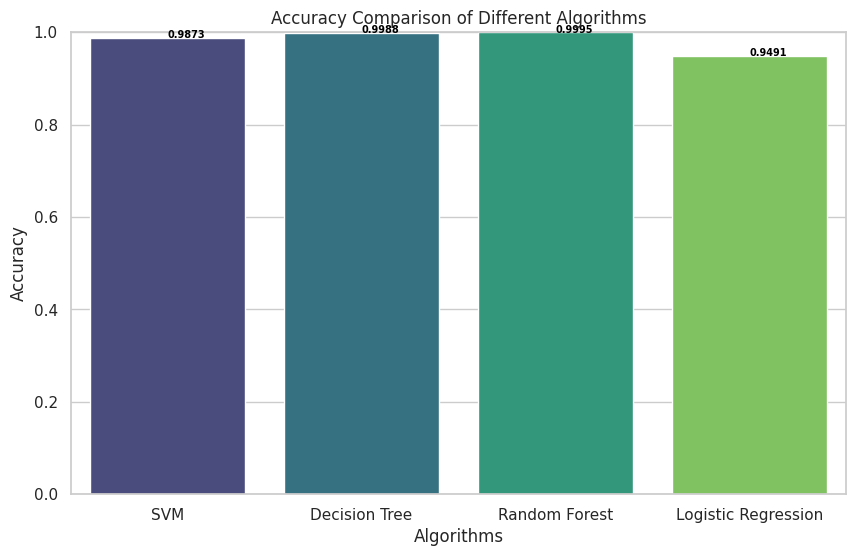

In [45]:
import seaborn as sns



algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']


accuracies = [svm_accuracy, dt_accuracy, rf_accuracy, lr_accuracy]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=algorithms, y=accuracies, palette="viridis")

for i, acc in enumerate(accuracies):
    ax.text(i, acc, f'{acc:.4f}', fontsize=7, color='black', fontweight='bold')

plt.title('Accuracy Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


<ipython-input-46-633a3d108069>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




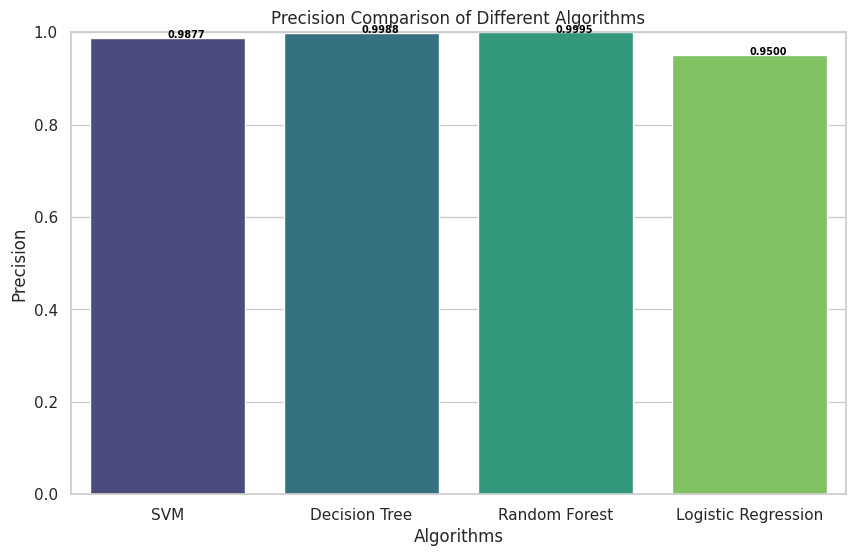

In [46]:
import seaborn as sns



algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']


precisions = [svm_precision, dt_precision, rf_precision, lr_precision]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=algorithms, y=precisions, palette="viridis")

for i, pre in enumerate(precisions):
    ax.text(i, pre, f'{pre:.4f}', fontsize=7, color='black', fontweight='bold')

plt.title('Precision Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()


<ipython-input-47-44adb112e1db>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




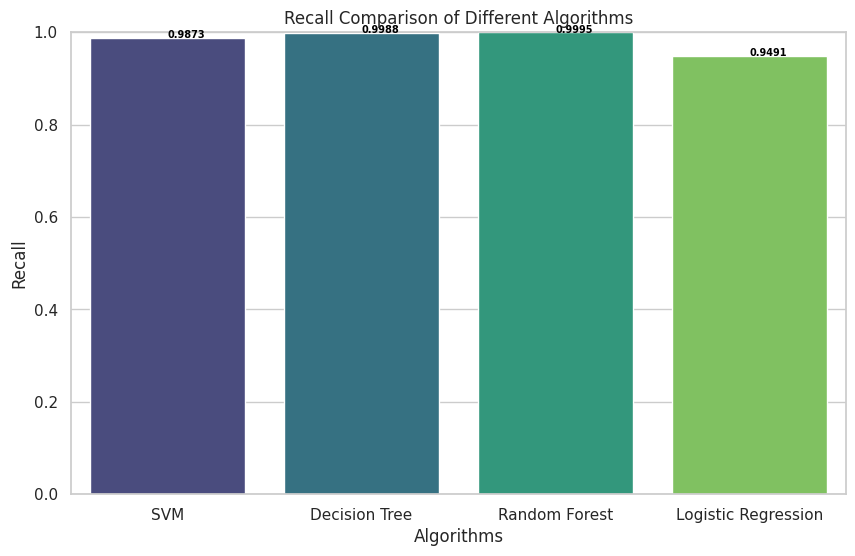

In [47]:
import seaborn as sns



algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']


Recall = [svm_recall, dt_recall, rf_recall, lr_recall]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=algorithms, y=Recall, palette="viridis")

for i, rec in enumerate(Recall):
    ax.text(i, rec, f'{rec:.4f}', fontsize=7, color='black', fontweight='bold')

plt.title('Recall Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()


<ipython-input-48-bb17cc4298d5>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




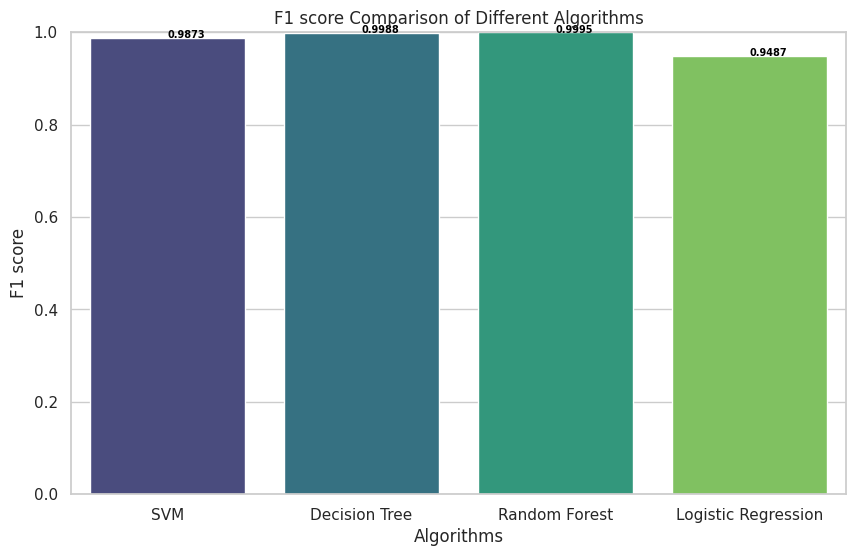

In [48]:
import seaborn as sns



algorithms = ['SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression']


f1 = [svm_f1, dt_f1, rf_f1, lr_f1]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=algorithms, y=f1, palette="viridis")

for i, f in enumerate(f1):
    ax.text(i, f, f'{f:.4f}', fontsize=7, color='black', fontweight='bold')

plt.title('F1 score Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 score')
plt.ylim(0, 1)
plt.show()
